## The Final Network

## imports:

In [16]:
#imports
import time
start_time = time.time()
import numpy as np
from matplotlib import pyplot as plt
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.metrics import binary_accuracy
from sklearn.metrics import roc_curve
#from keras.utils import np_utils
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0007371902465820312 seconds ---


In [2]:
# import datasets with time taken!

#the training dataset
start_time = time.time()
train = np.loadtxt("/home/willett/NeutrinoData/super_train_CNN_input_processed_cleaned_dropped.txt", comments='#')
print("--- %s seconds ---" % (time.time() - start_time))
print(train.shape)

#and the evaluation dataset
start_time = time.time()
test = np.loadtxt("/home/willett/NeutrinoData/test_CNN_input_processed.txt", comments='#')
print("--- %s seconds ---" % (time.time() - start_time))
print(test.shape)


# extract titles
tr = open("/home/willett/NeutrinoData/super_train_CNN_input_processed_cleaned_dropped.txt", "r")
te = open("/home/willett/NeutrinoData/test_CNN_input_processed.txt", "r")
trtitle = tr.readline()
tetitle = te.readline()
trtitle = trtitle[2:-1]
tetitle = tetitle[2:-1]
trtitleArr = trtitle.split()
tetitleArr = tetitle.split()
print(trtitleArr,"\n \n",tetitleArr)

--- 2.2724099159240723 seconds ---
(76523, 16)
--- 0.42290425300598145 seconds ---
(11571, 21)
['FirstLayer_H', 'LastLayer_H', 'NHits_H', 'AverageZP_H', 'Thrust_H', 'PID_Angle_H', 'PID_Front_H', 'PID_LLR_M_H', 'FirstLayer_L', 'LastLayer_L', 'NHits_L', 'AverageZP_L', 'PID_LLR_M_L', 'Distance_Bet', 'Sig', 'Bg'] 
 
 ['FirstLayer_H', 'LastLayer_H', 'NHits_H', 'AverageZP_H', 'Thrust_H', 'PID_Angle_H', 'PID_Front_H', 'PID_LLR_M_H', 'FirstLayer_L', 'LastLayer_L', 'NHits_L', 'AverageZP_L', 'Thrust_L', 'PID_Angle_L', 'PID_Front_L', 'PID_LLR_M_L', 'Energy_As', 'Angle_Bet', 'Distance_Bet', 'Sig', 'Bg']


In [3]:
# in preprocessing we dropped a number of columns from the training, lets do that to the test data
#we dropped columns: Thrust_L ,PID_Angle_L, PID_Front_L, Energy_As, Angle_Bet
# ie:                  12,           13        14           16         17

obj= np.array([12,13,14,16,17])
test2 = np.delete(test,obj,axis =1   )
test2.shape
tetitleArr2 =np.delete(tetitleArr,obj )
#print(tetitleArr2)
#print(trtitleArr)
#test2.shape

In [4]:
start_time = time.time()

# creating a dataset switch, change what UsedData is to change CNN
UD = train # Used Data = <dataset>
UDLength = UD.shape[0]
print("shape: ",UD.shape,"\nsize: ", UD.size," \nlength: ", UDLength)

# splitting X = dataset , Y = one hot vectors
X = UD[:,0:-2]
Y = UD[:,-2:1000]
print("X shape: ",X.shape,"\nY shape: ", Y.shape)
print("First line of X: ",X[0,:],"\n First line of Y: ",Y[0,:])

SigI = np.where(Y[:,0] == 1)[0] 
BgI= np.where(Y[:,0] == 0)[0]
SigN = SigI.size       # how much signal there is
BgN = BgI.size         # how much background there is
SNratio =  (100*SigN)/(SigN + BgN)
print(" Signal to Noise ratio: ",SNratio,"% signal")

print("--- %s seconds ---" % (time.time() - start_time))

shape:  (76523, 16) 
size:  1224368  
length:  76523
X shape:  (76523, 14) 
Y shape:  (76523, 2)
First line of X:  [3.16129024e-04 4.42580633e-03 3.79354828e-03 6.37316112e-01
 2.97829927e-04 1.64063032e-02 4.12519545e-04 5.24418787e-03
 6.32258047e-04 1.58064512e-03 1.58064512e-03 6.25935467e-01
 2.58228694e-03 4.48798607e-01] 
 First line of Y:  [0. 1.]
 Signal to Noise ratio:  49.463559975432226 % signal
--- 0.013779878616333008 seconds ---


In [5]:
print(X.shape)
X2 = np.expand_dims(X, axis=2)
print(X2.shape)

(76523, 14)
(76523, 14, 1)


## testing overfit of small data

In [6]:
TotLength = X2.shape[0]
smallLength = int(0.10* TotLength)
tinyLength  = 2
print(smallLength)
Xsmall = X2[0:smallLength]
Ysmall = Y[0:smallLength]
Xtiny = X2[0:tinyLength]
Ytiny = Y[0:tinyLength]
np.mean(Ytiny[:,0])

7652


0.5

## the network:

In [7]:
#neural network architecture:
model = Sequential()

# set variables:
width = 50 #--number on nodes in the layer
parwidth = int(width/2)
DR = 0.2 #--fraction of nodes dropped during training
AT = "sigmoid" #--activation type for dense layers
UB = True #--use bias vectors 
InDim = (14,1) #--input shape of single sample (tuple)

#construction:
start_time = time.time() # how long does it take?
model.add(Dense(width,activation=AT, use_bias=UB, input_shape=InDim )) # input layer and 1
model.add(Dropout(DR))
model.add(Dense(width,activation=AT, use_bias=UB )) # 2
model.add(Dropout(DR))
model.add(Dense(width,activation=AT, use_bias=UB )) # 3
model.add(Dropout(DR))
model.add(Dense(width,activation=AT, use_bias=UB )) # 4
model.add(Dropout(DR))

#Because this one is deep: but not that deep
model.add(Dense(width,activation=AT, use_bias=UB )) # 5
model.add(Dropout(DR))
model.add(Dense(width,activation=AT, use_bias=UB )) # 6
model.add(Dropout(DR))

#Possible additional depth
model.add(Dense(width,activation=AT, use_bias=UB )) # 7
model.add(Dropout(DR))
model.add(Dense(width,activation=AT, use_bias=UB )) # 8(!)
model.add(Dropout(DR))

#Crazy depth!!!!!!!
model.add(Dense(width,activation=AT, use_bias=UB )) # 9(!)
model.add(Dropout(DR))
model.add(Dense(width,activation=AT, use_bias=UB )) # 10(!)
model.add(Dropout(DR))
model.add(Dense(width,activation=AT, use_bias=UB )) # 11(!)
model.add(Dropout(DR))
model.add(Dense(width,activation=AT, use_bias=UB )) # 12(!)
model.add(Dropout(DR))

model.add(Flatten())  # reduce dimensionality of the input data for output

model.add(Dense(2, activation="softmax", use_bias=UB)) # output layer softmax recommended 

#(classification mutually excluive + softmax differentiable for optimizing)
# -> https://www.quora.com/Artificial-Neural-Networks-Why-do-we-use-softmax-function-for-output-layer

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.6255948543548584 seconds ---


In [8]:
# compile model:
start_time = time.time() # how long does it take?
model.compile(optimizer='adam',            
              loss='binary_crossentropy',               
              metrics=['accuracy', 'binary_accuracy' ])

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.06150245666503906 seconds ---


In [9]:
# Train the model, iterating on the data in batches

start_time = time.time()               # how long does it take?
history = model.fit(Xsmall,                # the (now oversampled) dataset
          Ysmall,                           #true or false values for the dataset 
          epochs=100  ,                #number of iteration over data
          batch_size=100,              #number of trainings between tests
          verbose=1,                   #prints one line per epoch of progress bar
          validation_split=0.1,        #ratio of test to train
          shuffle = True  )    

print("--- %s seconds ---" % (time.time() - start_time))

Train on 6886 samples, validate on 766 samples
Epoch 1/100
6886/6886 [==============================] - 8s 1ms/step - loss: 0.7282 - acc: 0.5033 - binary_accuracy: 0.5033 - val_loss: 0.6923 - val_acc: 0.5209 - val_binary_accuracy: 0.5209
Epoch 2/100
6886/6886 [==============================] - 6s 927us/step - loss: 0.7129 - acc: 0.5076 - binary_accuracy: 0.5076 - val_loss: 0.6937 - val_acc: 0.5209 - val_binary_accuracy: 0.5209
Epoch 3/100
6886/6886 [==============================] - 6s 928us/step - loss: 0.7135 - acc: 0.4907 - binary_accuracy: 0.4907 - val_loss: 0.6933 - val_acc: 0.5209 - val_binary_accuracy: 0.5209
Epoch 4/100
6886/6886 [==============================] - 7s 961us/step - loss: 0.7125 - acc: 0.5076 - binary_accuracy: 0.5076 - val_loss: 0.6923 - val_acc: 0.5209 - val_binary_accuracy: 0.5209
Epoch 5/100
6886/6886 [==============================] - 7s 1ms/step - loss: 0.7041 - acc: 0.4965 - binary_accuracy: 0.4965 - val_loss: 0.6961 - val_acc: 0.4791 - val_binary_accuracy:

6886/6886 [==============================] - 7s 955us/step - loss: 0.6933 - acc: 0.5009 - binary_accuracy: 0.5009 - val_loss: 0.6926 - val_acc: 0.5209 - val_binary_accuracy: 0.5209
Epoch 44/100
6886/6886 [==============================] - 6s 894us/step - loss: 0.6933 - acc: 0.5013 - binary_accuracy: 0.5013 - val_loss: 0.6924 - val_acc: 0.5209 - val_binary_accuracy: 0.5209
Epoch 45/100
6886/6886 [==============================] - 7s 959us/step - loss: 0.6933 - acc: 0.4985 - binary_accuracy: 0.4985 - val_loss: 0.6933 - val_acc: 0.4791 - val_binary_accuracy: 0.4791
Epoch 46/100
6886/6886 [==============================] - 7s 1ms/step - loss: 0.6931 - acc: 0.5123 - binary_accuracy: 0.5123 - val_loss: 0.6927 - val_acc: 0.5209 - val_binary_accuracy: 0.5209
Epoch 47/100
6886/6886 [==============================] - 7s 969us/step - loss: 0.6931 - acc: 0.5083 - binary_accuracy: 0.5083 - val_loss: 0.6932 - val_acc: 0.4791 - val_binary_accuracy: 0.4791
Epoch 48/100
6886/6886 [=====================

6886/6886 [==============================] - 7s 1ms/step - loss: 0.6931 - acc: 0.4978 - binary_accuracy: 0.4978 - val_loss: 0.6927 - val_acc: 0.5209 - val_binary_accuracy: 0.5209
Epoch 86/100
6886/6886 [==============================] - 7s 973us/step - loss: 0.6932 - acc: 0.5038 - binary_accuracy: 0.5038 - val_loss: 0.6928 - val_acc: 0.5209 - val_binary_accuracy: 0.5209
Epoch 87/100
6886/6886 [==============================] - 6s 909us/step - loss: 0.6932 - acc: 0.4999 - binary_accuracy: 0.4999 - val_loss: 0.6927 - val_acc: 0.5209 - val_binary_accuracy: 0.5209
Epoch 88/100
6886/6886 [==============================] - 6s 930us/step - loss: 0.6932 - acc: 0.5051 - binary_accuracy: 0.5051 - val_loss: 0.6928 - val_acc: 0.5209 - val_binary_accuracy: 0.5209
Epoch 89/100
6886/6886 [==============================] - 6s 927us/step - loss: 0.6933 - acc: 0.4968 - binary_accuracy: 0.4968 - val_loss: 0.6929 - val_acc: 0.5209 - val_binary_accuracy: 0.5209
Epoch 90/100
6886/6886 [=====================

## evaluate the NN:

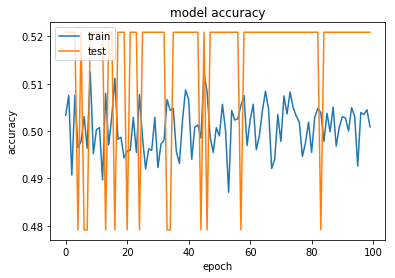

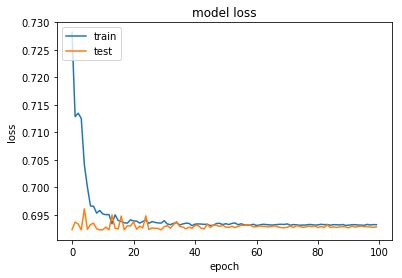

In [10]:
#summarise history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:

# splitting X = dataset , Y = one hot vectors
xtest = test2[:,0:-2]
ytest = test2[:,-2:1000]
xtest2 = np.expand_dims(xtest, axis=2)
print("xtest shape: ",xtest.shape,"\n post expand Dim xtest shape",xtest2.shape,"\n ytest shape: ", ytest.shape)

# evaluate accuracy
print(model.metrics_names)
model.evaluate(xtest2, ytest, batch_size=None, verbose=1, sample_weight=None, steps=None)

# assuming evaluate and predict output the same...
ypredict = model.predict(xtest2, batch_size=None, verbose=1, steps=None)

xtest shape:  (11571, 14) 
 post expand Dim xtest shape (11571, 14, 1) 
 ytest shape:  (11571, 2)
['loss', 'acc', 'binary_accuracy']
11571/11571 [==============================] - 8s 670us/step


[0.6853054026345397, 0.9761472647135079, 0.9761472647135079]

(array([], dtype=int64),) [0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0.]


/home/willett/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


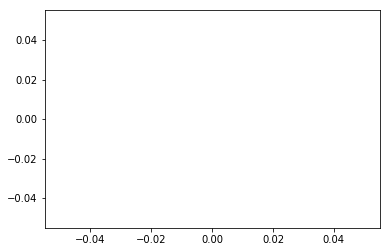

In [58]:
#print(ypredict[0:50,:])

#roc curve needs binary vectors.

# the predictions
Ones = np.where(ypredict[:,0]>= 0.5)
ypredictbin = np.zeros((ypredict.shape[0],))
np.put(ypredictbin,Ones,1)
print(Ones,ypredictbin)

# the actual
Ones = np.where(ytest[:,0]==1)
ytestbin = np.zeros((ytest.shape[0],))
np.put(ytestbin,Ones,1)
print(ytestbin[10:35])



fpr , tpr , thresholds = roc_curve(ypredictbin, ytestbin, pos_label=2, sample_weight=None, drop_intermediate=True)

plt.plot(fpr,tpr)

In [12]:
# what!?!?!?!?!? ^^^^ thats way too high

# see if test data in the training set by accident
#(xtest2 == X2).all(0).any()
#np.unique
#c = np.array(set(xtest2).symmetric_difference(X2))
intersect = np.intersect1d(xtest2[:, 0], X2[:, 0])
print(intersect.shape)

(0,)


print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

Confusion matrix, without normalization
[[    0   276]
 [    0 11295]]


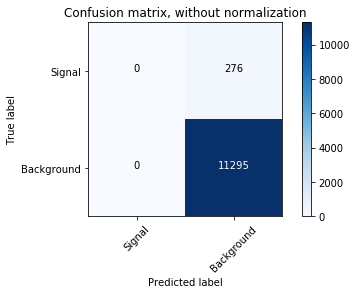

In [13]:
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

confX = xtest2
confY = ytest

y_prob=model.predict(confX)
y_pred = y_prob.argmax(axis=-1)
y_test_labels = confY.argmax(axis=-1)
cnf_matrix=confusion_matrix(y_test_labels, y_pred)
class_names = ['Signal','Background']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
